In [286]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython import display
from pandas.tools.plotting import scatter_matrix
import scipy as sp
import scipy.io

In [37]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

# Multi-class Classification
We will use logistic regression and neural networks to recognize handwritten digits (from 0 to 9). Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks.

In [178]:
mat = scipy.io.loadmat('Exercises_3/ex3/ex3data1.mat')
X, y = mat['X'], mat['y']

There are 5000 training examples in `ex3data1.mat`, where each training example is a 20 pixel by 20 pixel grayscale image of the digit. Each pixel is represented by a floating point number indicating the grayscale intensity at that location. The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. Each of these training examples becomes a single row in our data matrix $X$. This gives us a 5000 by 400 matrix $X$ where every row is a training example for a handwritten digit image.

Indexing at 1 instead of 0 is probably a sin so we'll fix that by changing all of the "10" values in the $y$ vector, meant to represent 0, with a 0 for consistency. 

In [204]:
y[y==10] = 0

### Visualize Data
We'll define a function that let's us visualize a 100 random samples from our dataset X.

In [179]:
def displayData( X, theta = None ):
    """
    Display Function taken from:
    https://github.com/subokita/mlclass/blob/master/ex3.py#L42
    """
    width = 20
    rows, cols = 10, 10
    out = np.zeros(( width * rows, width*cols ))

    rand_indices = np.random.permutation( 5000 )[0:rows * cols]

    counter = 0
    for y in range(0, rows):
        for x in range(0, cols):
            start_x = x * width
            start_y = y * width
            out[start_x:start_x+width, start_y:start_y+width] = X[rand_indices[counter]].reshape(width, width).T
            counter += 1

    img = scipy.misc.toimage( out )
    figure  = plt.figure()
    axes    = figure.add_subplot(111)
    axes.imshow( img )


    if theta is not None:
        result_matrix = []
        X_biased = c_[ ones( shape(X)[0] ), X ]

        for idx in rand_indices:
            result = (argmax( theta.T.dot(X_biased[idx]) ) + 1) % 10
            result_matrix.append( result )

        result_matrix = array( result_matrix ).reshape( rows, cols ).transpose()
        print result_matrix

    plt.show()

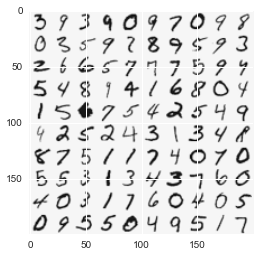

In [205]:
displayData(X)

### Scikit Learn
Because this is the modern age, we won't waste our time reimplemnting every algorithm from scratch.

In [219]:
from sklearn import linear_model

In [321]:
logreg = linear_model.LogisticRegression(C=.1)
y = y.ravel()

In [322]:
logreg.fit(X, y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [323]:
from sklearn import cross_validation
from sklearn import metrics

In [324]:
cross_validation.cross_val_score(logreg, X, y)

array([ 0.87724551,  0.90359281,  0.89036145])

In [260]:
predicted = cross_validation.cross_val_predict(logreg, X, y)

In [284]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, xrange(10), rotation=45)
    plt.yticks(tick_marks, xrange(10))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

array([[462,   0,   4,   6,   1,  15,   4,   2,   3,   3],
       [  1, 465,   3,   4,   3,   5,   0,   2,  16,   1],
       [ 11,  11, 393,  13,  10,   4,  10,   9,  30,   9],
       [  5,  11,  22, 379,   5,  34,   1,   6,  21,  16],
       [  4,   3,   8,   1, 409,   5,  10,   4,  20,  36],
       [  8,   5,   4,  32,   8, 387,  11,   2,  28,  15],
       [  7,   2,  15,   0,   7,  18, 440,   0,   7,   4],
       [  5,   9,   2,  10,  11,   0,   1, 427,   2,  33],
       [  9,  18,  13,  16,  12,  21,  12,   3, 376,  20],
       [ 10,   5,   3,   8,  29,  17,   3,  32,  15, 378]])

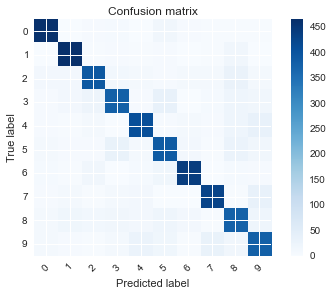

In [285]:
cm = metrics.confusion_matrix(y, predicted)
plot_confusion_matrix(cm)
cm

### Improve our accuracy
For fun, we'll follow SKLearn's recommendation for digit identification and use Support Vector Machine

In [288]:
from sklearn import svm

In [332]:
classifier = svm.SVC(gamma=.1)

In [333]:
classifier.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.1,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [334]:
cross_validation.cross_val_score(classifier, X, y)

array([ 0.94071856,  0.95568862,  0.95421687])

In [339]:
predicted = cross_validation.cross_val_predict(classifier, X, y)

In [340]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.1,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       0.97      0.98      0.98       500
          1       0.98      0.97      0.98       500
          2       0.88      0.96      0.92       500
          3       0.95      0.92      0.93       500
          4       0.95      0.95      0.95       500
          5       0.94      0.95      0.95       500
          6       0.97      0.96      0.97       500
          7       0.96      0.94      0.95       500
          8       0.95      0.94      0.94       500
          9       0.95      0.92      0.94       500

avg / total       0.95      0.95      0.95      5000


Confusion matrix:
[[489   0   3   1   1   1   2   0   3   0]
 [  0 485   5   1   2   1   1   2   3   0]
 [  3   1 482   4   3   1   0

### Dimensionality Reduction

In [341]:
from sklearn import decomposition

In [347]:
pca = decomposition.PCA(n_components=2)

In [348]:
pca.fit(X)

PCA(copy=True, n_components=2, whiten=False)

In [349]:
print(pca.explained_variance_ratio_) 

[ 0.11060631  0.07975676]


### Vectorizing Logistic Regression
We'll go ahead and try and vectorize regularized logistic regression.  We defined unregularized logistic regression (in vector form) last week.  We'll follow the standard now that all vectors are column vectors (i.e. row = 1, r,x).

Our vector implementation for regularization is trying to emulate: $\frac{\lambda}{2m}\sum_{j=1}^n \theta_j^2$, so we need to make sure not to affect our 0th, or bias, term. 

In [207]:
def reg_cost_fn(theta, X, y, lam):
    m = len(y)
    g_xo = sigmoid(np.dot(X, theta))
    p1 = np.dot(np.log(g_xo).T, y)
    p2 = np.dot(np.log(1-g_xo).T, (1-y))
    
    # Regularization term
    reg = theta.T.dot( theta ) * (lam / (2*m))
    return float((-1.0/(len(X))) * (p1 + p2)) + reg

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### One-vs-all Classification

We will implement one-vs-all classification by training multiple regularized logistic regression classifiers, one for each of the $K$ classes in our dataset.  We'll return a matrix $\Theta \in \mathbb{R}^{K x (n+1)}$, where each row of $\Theta$ corresponds to the learned logistic regression parameters for one class.